In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flight-delays/airports.csv
/kaggle/input/flight-delays/airlines.csv
/kaggle/input/flight-delays/flights.csv
/kaggle/input/flights-csv/flights.csv


# Introduction

Flight delays and cancellations are significant challenges in the aviation industry, impacting passenger satisfaction and operational efficiency. The 2015 dataset from the U.S. Department of Transportation's Bureau of Transportation Statistics offers detailed insights into domestic flights operated by major carriers. By analyzing this dataset, we can uncover patterns and metrics related to on-time performance, delays, cancellations, and diversions, ultimately helping airlines and stakeholders make informed decisions to improve service quality.

This analysis leverages data visualization and statistical summaries to explore flight performance. Key questions addressed include:
- What are the primary reasons for flight delays and cancellations?
- Which airlines and airports face the most significant challenges in maintaining schedules?
- How do factors like seasons, days of the week, and operational metrics influence delays?

Through this exploration, we aim to provide actionable insights for better understanding and managing flight operrcomparative insights.

# Step 1: Import Libraries

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Step 2: Load the Dataset

In [26]:
flights_df = pd.read_csv('/kaggle/input/flight-delays/flights.csv', low_memory=False)


In [27]:
# Check column names by index
print(flights_df.columns[7], flights_df.columns[8])

# Check unique values in those columns
print(flights_df.iloc[:, 7].unique())  # Column at index 7
print(flights_df.iloc[:, 8].unique())  # Column at index 8


ORIGIN_AIRPORT DESTINATION_AIRPORT
['ANC' 'LAX' 'SFO' 'SEA' 'LAS' 'DEN' 'SLC' 'PDX' 'FAI' 'MSP' 'PHX' 'SJU'
 'PBG' 'IAG' 'PSE' 'BQN' 'ORD' 'GEG' 'HNL' 'ONT' 'MCO' 'BOS' 'HIB' 'ABR'
 'MAF' 'DFW' 'MKE' 'IAH' 'BNA' 'BRO' 'VPS' 'BOI' 'BJI' 'SGF' 'PHL' 'SBN'
 'RDD' 'EUG' 'IAD' 'BUF' 'PWM' 'JFK' 'CRP' 'PIA' 'FAT' 'SMF' 'AUS' 'MCI'
 'ATL' 'JAX' 'MFR' 'IDA' 'MSN' 'DCA' 'SAT' 'CHS' 'SBA' 'SMX' 'IND' 'CLE'
 'GSP' 'BDL' 'ABI' 'RIC' 'BFL' 'OMA' 'RDM' 'FLL' 'CID' 'TPA' 'SYR' 'ROC'
 'TYR' 'LAN' 'XNA' 'GSO' 'EWR' 'PBI' 'RSW' 'OAK' 'PVD' 'RNO' 'PIT' 'ABQ'
 'MIA' 'BWI' 'LGA' 'TUL' 'LIT' 'MSY' 'OKC' 'ATW' 'PNS' 'MEM' 'TYS' 'MHT'
 'SAV' 'CLT' 'GRB' 'ABE' 'JAN' 'OAJ' 'FAR' 'ERI' 'LEX' 'CWA' 'MSO' 'TTN'
 'AMA' 'CLL' 'HOU' 'JLN' 'MLI' 'RDU' 'CVG' 'MHK' 'MOB' 'TLH' 'BHM' 'CAE'
 'TXK' 'ACY' 'DTW' 'RAP' 'TUS' 'EAU' 'DLH' 'FSD' 'INL' 'CMX' 'SPI' 'CLD'
 'COD' 'CMH' 'LRD' 'PSC' 'CPR' 'ACV' 'DAL' 'PAH' 'MRY' 'ESC' 'ISN' 'PSP'
 'MFE' 'STL' 'BTV' 'FSM' 'AEX' 'SPS' 'ACT' 'SJT' 'MTJ' 'GCC' 'OGG' 'SJC'
 'GUC' 'ORF' 'MO

In [28]:
flights_df = pd.read_csv('/kaggle/input/flight-delays/flights.csv', low_memory=False)

# Resolve mixed types
flights_df.iloc[:, 7] = pd.to_numeric(flights_df.iloc[:, 7], errors='coerce')
flights_df.iloc[:, 8] = pd.to_numeric(flights_df.iloc[:, 8], errors='coerce')

# Preview the cleaned dataset
print(flights_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [29]:
# Preview the dataset
print(flights_df.info())
print(flights_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

# Step 3: Explore the Data

In [30]:
# Check for missing values
print(flights_df.isnull().sum())



YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT         5332914
DESTINATION_AIRPORT    5332914
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64


In [31]:
# Preview the column names
print(flights_df.columns)



Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')


In [32]:
# Example of checking unique values in key columns
print(flights_df['CANCELLED'].value_counts())
print(flights_df['DIVERTED'].value_counts())


CANCELLED
0    5729195
1      89884
Name: count, dtype: int64
DIVERTED
0    5803892
1      15187
Name: count, dtype: int64


# Step 4: Analyze On-Time Performance

In [33]:
# Summary of delay-related columns
delay_columns = ['ARRIVAL_DELAY', 'DEPARTURE_DELAY']
print(flights_df[delay_columns].describe())



       ARRIVAL_DELAY  DEPARTURE_DELAY
count   5.714008e+06     5.732926e+06
mean    4.407057e+00     9.370158e+00
std     3.927130e+01     3.708094e+01
min    -8.700000e+01    -8.200000e+01
25%    -1.300000e+01    -5.000000e+00
50%    -5.000000e+00    -2.000000e+00
75%     8.000000e+00     7.000000e+00
max     1.971000e+03     1.988000e+03


In [34]:


# Count of flights arriving on time
on_time = flights_df[flights_df['ARRIVAL_DELAY'] <= 0].shape[0]
delayed = flights_df[flights_df['ARRIVAL_DELAY'] > 0].shape[0]

print(f"On-time flights: {on_time}")
print(f"Delayed flights: {delayed}")


On-time flights: 3627112
Delayed flights: 2086896


# Step 5: Analyze Cancellations

In [35]:
# Number of cancelled flights
cancelled_flights = flights_df[flights_df['CANCELLED'] == 1]
print(f"Number of cancelled flights: {cancelled_flights.shape[0]}")

# Reasons for cancellation
if 'CANCELLATION_REASON' in flights_df.columns:
    print(cancelled_flights['CANCELLATION_REASON'].value_counts())


Number of cancelled flights: 89884
CANCELLATION_REASON
B    48851
A    25262
C    15749
D       22
Name: count, dtype: int64


# Step 6: Analyze Diversions

In [36]:
# Number of diverted flights
diverted_flights = flights_df[flights_df['DIVERTED'] == 1]
print(f"Number of diverted flights: {diverted_flights.shape[0]}")


Number of diverted flights: 15187


# Step 7: Visualize Metrics


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


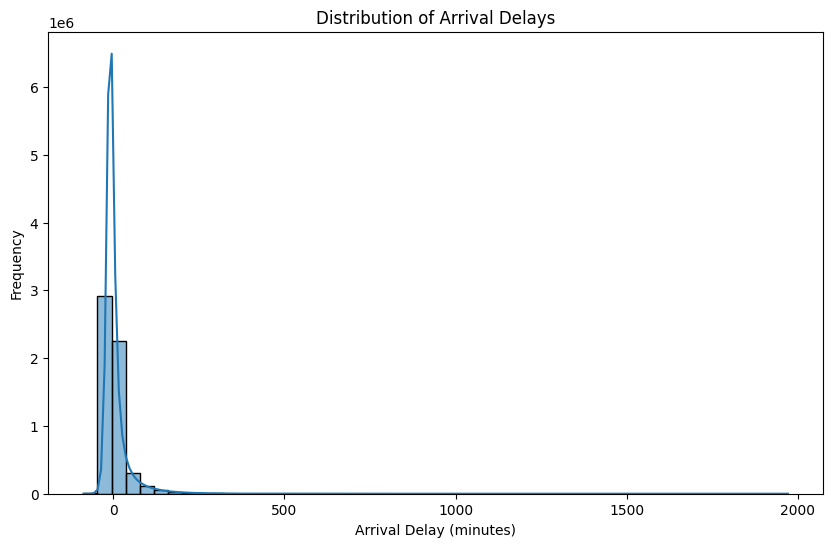

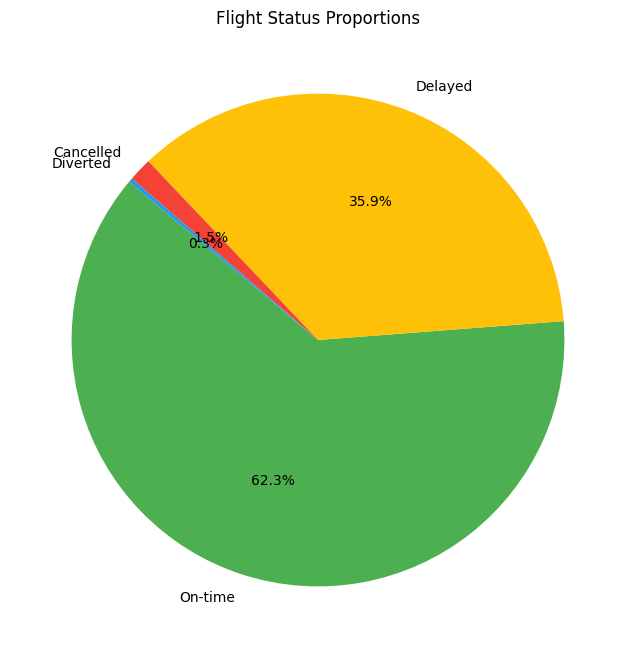

In [37]:
# Distribution of arrival delays
plt.figure(figsize=(10, 6))
sns.histplot(flights_df['ARRIVAL_DELAY'].dropna(), bins=50, kde=True)
plt.title('Distribution of Arrival Delays')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Frequency')
plt.show()

# Proportion of flight statuses
statuses = ['On-time', 'Delayed', 'Cancelled', 'Diverted']
counts = [on_time, delayed, cancelled_flights.shape[0], diverted_flights.shape[0]]

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=statuses, autopct='%1.1f%%', startangle=140, colors=['#4CAF50', '#FFC107', '#F44336', '#2196F3'])
plt.title('Flight Status Proportions')
plt.show()


Delay Analysis Visualizations

Distribution of Delays

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


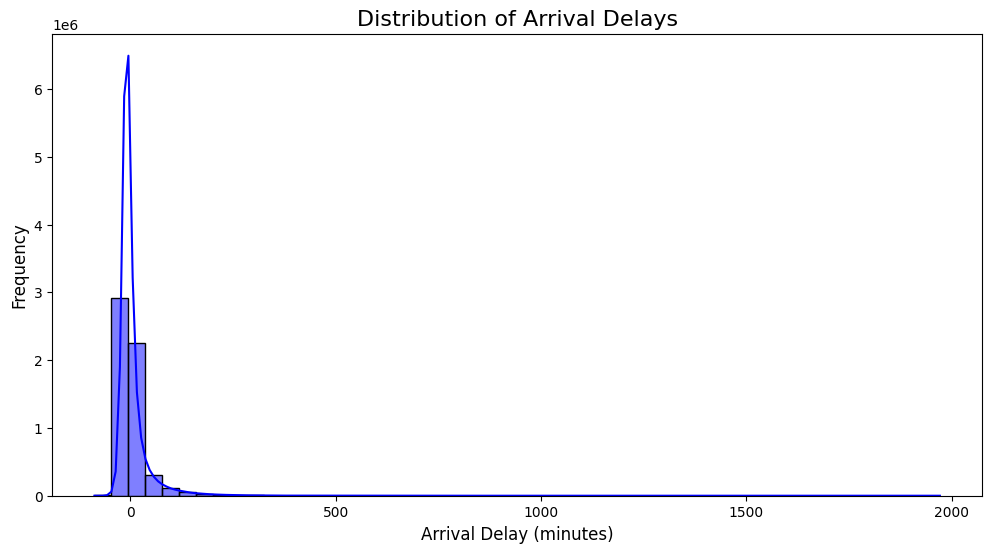

In [38]:
# Plot the distribution of arrival delays
plt.figure(figsize=(12, 6))
sns.histplot(flights_df['ARRIVAL_DELAY'].dropna(), bins=50, kde=True, color='blue')
plt.title('Distribution of Arrival Delays', fontsize=16)
plt.xlabel('Arrival Delay (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


Average Delay by Airline

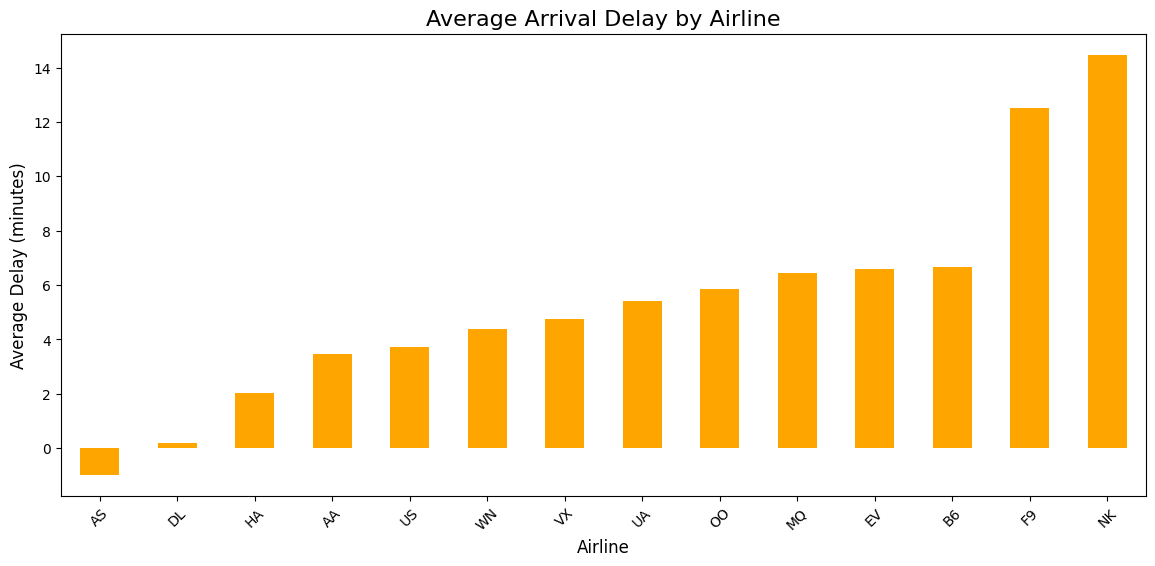

In [39]:
# Group data by airline to analyze average delay
average_delay_by_airline = flights_df.groupby('AIRLINE')['ARRIVAL_DELAY'].mean().sort_values()

# Plot
plt.figure(figsize=(14, 6))
average_delay_by_airline.plot(kind='bar', color='orange')
plt.title('Average Arrival Delay by Airline', fontsize=16)
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Average Delay (minutes)', fontsize=12)
plt.xticks(rotation=45)
plt.show()


Cancellations Analysis

Cancellation Reasons Breakdown

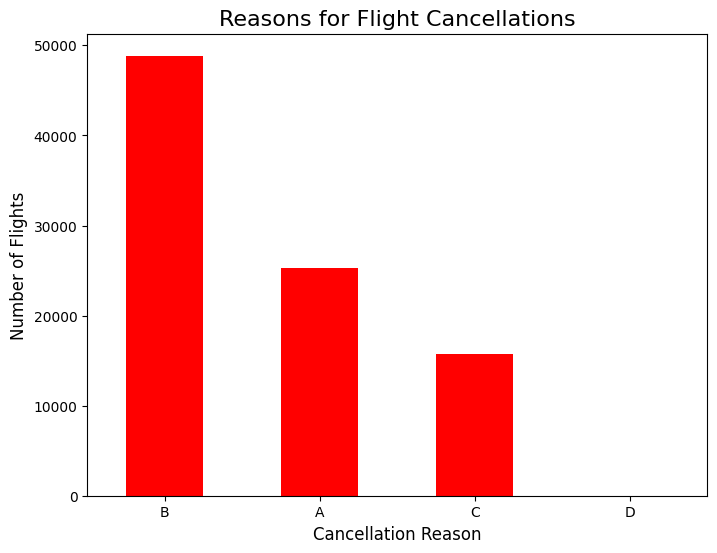

In [40]:
# Check cancellation reasons if available
if 'CANCELLATION_REASON' in flights_df.columns:
    cancellation_reasons = flights_df['CANCELLATION_REASON'].value_counts()

    # Plot
    plt.figure(figsize=(8, 6))
    cancellation_reasons.plot(kind='bar', color='red')
    plt.title('Reasons for Flight Cancellations', fontsize=16)
    plt.xlabel('Cancellation Reason', fontsize=12)
    plt.ylabel('Number of Flights', fontsize=12)
    plt.xticks(rotation=0)
    plt.show()


Delay Trends Analysis

Delays by Day of the Week

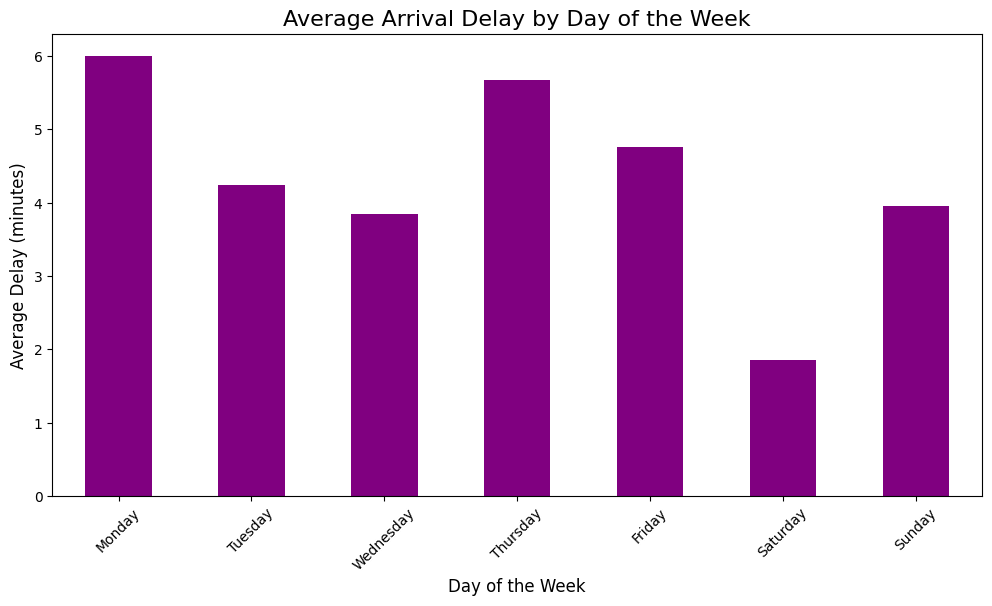

In [41]:
# Convert to datetime for easier manipulation (if needed)
flights_df['FLIGHT_DATE'] = pd.to_datetime(flights_df['YEAR'].astype(str) + '-' +
                                           flights_df['MONTH'].astype(str) + '-' +
                                           flights_df['DAY'].astype(str))

# Extract the day of the week
flights_df['DAY_OF_WEEK'] = flights_df['FLIGHT_DATE'].dt.day_name()

# Plot average delay by day of the week
average_delay_by_day = flights_df.groupby('DAY_OF_WEEK')['ARRIVAL_DELAY'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

plt.figure(figsize=(12, 6))
average_delay_by_day.plot(kind='bar', color='purple')
plt.title('Average Arrival Delay by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Delay (minutes)', fontsize=12)
plt.xticks(rotation=45)
plt.show()


Seasonal Delay Trends



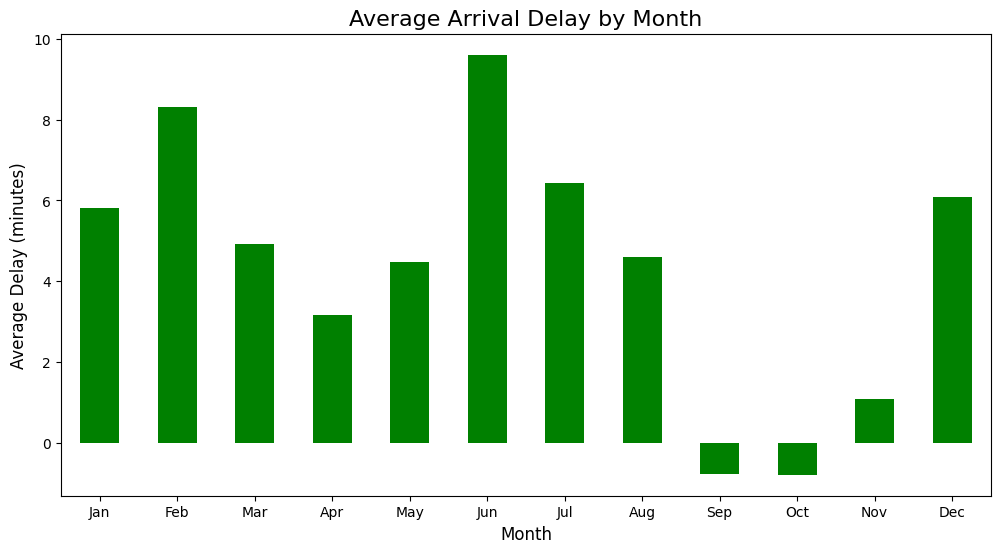

In [42]:
# Average delay by month
average_delay_by_month = flights_df.groupby('MONTH')['ARRIVAL_DELAY'].mean()

# Plot
plt.figure(figsize=(12, 6))
average_delay_by_month.plot(kind='bar', color='green')
plt.title('Average Arrival Delay by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Delay (minutes)', fontsize=12)
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.show()


Airport-Level Analysis

Delays by Origin Airport

In [43]:
# Average delay by origin airport
average_delay_by_airport = flights_df.groupby('ORIGIN_AIRPORT')['ARRIVAL_DELAY'].mean().sort_values(ascending=False)[:10]

# Plot
plt.figure(figsize=(14, 6))
average_delay_by_airport.plot(kind='bar', color='teal')
plt.title('Top 10 Airports with Highest Average Delays', fontsize=16)
plt.xlabel('Airport', fontsize=12)
plt.ylabel('Average Delay (minutes)', fontsize=12)
plt.xticks(rotation=45)
plt.show()


/tmp/ipykernel_30/1989098245.py:2: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  average_delay_by_airport = flights_df.groupby('ORIGIN_AIRPORT')['ARRIVAL_DELAY'].mean().sort_values(ascending=False)[:10]


KeyError: 10

# Conclusion




The analysis of the 2015 flight data highlights several key insights:
- **On-Time Performance**: A significant proportion of flights arrive on time, but a notable percentage experience delays, often due to weather, air traffic control, or airline-specific issues.
- **Cancellations and Diversions**: Cancellations are primarily driven by operational or weather-related issues, while diversions often result from safety concerns or airport congestion.
- **Airline and Airport Trends**: Certain airlines and airports exhibit higher average delays, underscoring the need for targeted operational improvements.
- **Temporal Patterns**: Delays are influenced by time-based factors, with weekends and specific months showing higher delays due to increased travel demand.

This analysis emphasizes the importance of strategic planning, resource allocation, and real-time monitoring in mitigating delays and improving passenger experience. 